In [1]:
#import libery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("creditcard_data.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284806, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

In [6]:
#Sum of missing cells for each attribute
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#Number of distinct categories or classes i.e., Fraudulent and Genuine
data['Class'].nunique()

2

In [8]:
#number of instances per class
count=data.Class.value_counts()
count

0    284314
1       492
Name: Class, dtype: int64

0    284314
1       492
Name: Class, dtype: int64

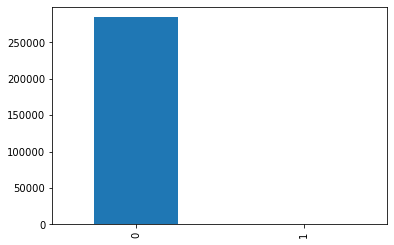

In [9]:
count.plot(kind = 'bar')
count

<AxesSubplot:>

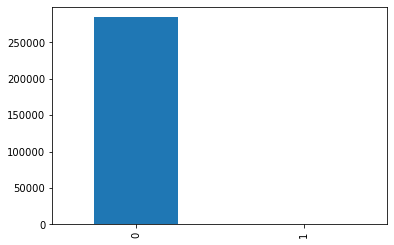

In [10]:
data.Class.value_counts().plot.bar()

In [11]:
frauds = data[data.Class == 1]
normal = data[data.Class == 0]

In [12]:
frauds.shape

(492, 31)

In [13]:
normal.shape

(284314, 31)

In [14]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
normal.Amount.describe()

count    284314.000000
mean         88.290570
std         250.105416
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

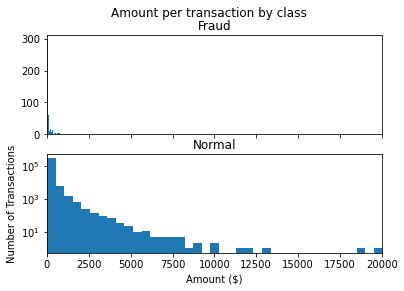

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

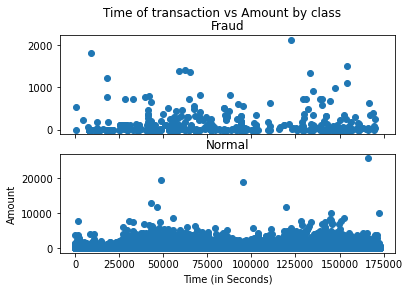

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

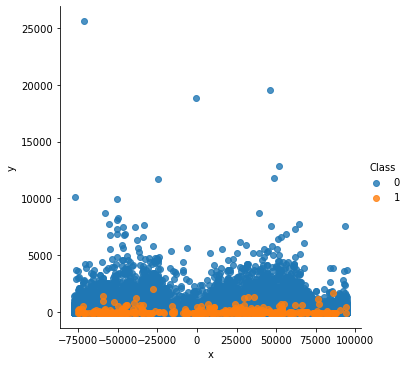

In [18]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
creditcard_2d= pd.DataFrame(pca.fit_transform(data.iloc[:,0:30]))
creditcard_2d= pd.concat([creditcard_2d,data['Class']], axis=1)
creditcard_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=creditcard_2d, fit_reg=False, hue='Class')

In [19]:
#Descriptive Statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405007e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
#checking the percentage of each class in the dataset
(data.Class.value_counts())/(data.Class.count())

0    0.998273
1    0.001727
Name: Class, dtype: float64

# Data Split

In [21]:
from sklearn.model_selection import train_test_split
y = data['Class']
x = data.drop('Class',axis=1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=33)

In [23]:
number_records_fraud = len(y_train[data.Class == 1])
number_records_fraud


341

In [24]:
number_records_normal = len(y_train[data.Class == 0])
number_records_normal

199023

# Resampling

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4001)
x_res, y_res = sm.fit_resample(x_train, y_train)
pd.value_counts(y_res)

1    199023
0    199023
Name: Class, dtype: int64

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
lrclf = LogisticRegression()
lrclf = lrclf.fit(x_res,y_res)
train_under_p = lrclf.predict(x_res)
print (classification_report(y_res, train_under_p))
test_under_p = lrclf.predict(x_test)
print (classification_report(y_test, test_under_p))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    199023
           1       0.98      0.97      0.98    199023

    accuracy                           0.98    398046
   macro avg       0.98      0.98      0.98    398046
weighted avg       0.98      0.98      0.98    398046

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85291
           1       0.08      0.85      0.15       151

    accuracy                           0.98     85442
   macro avg       0.54      0.92      0.57     85442
weighted avg       1.00      0.98      0.99     85442



with gridsearchcv

In [28]:
param_grid = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100]}
lrclf = GridSearchCV(LogisticRegression(), param_grid,cv=5)
lrclf = lrclf.fit(x_res,y_res)
lrclf.best_params_

/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/abdullah/anaconda3/lib/

/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/abdullah/anaconda3/lib/

/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/abdullah/anaconda3/l

/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

{'C': 0.01, 'penalty': 'l2'}

In [29]:
lrclf = LogisticRegression(C=0.01,penalty='l2')
lrclf = lrclf.fit(x_res,y_res)
train_under_p = lrclf.predict(x_res)
print (classification_report(y_res, train_under_p))
test_under_p = lrclf.predict(x_test)
print (classification_report(y_test, test_under_p))

/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.99      0.98    199023
           1       0.99      0.98      0.98    199023

    accuracy                           0.98    398046
   macro avg       0.98      0.98      0.98    398046
weighted avg       0.98      0.98      0.98    398046

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85291
           1       0.11      0.86      0.20       151

    accuracy                           0.99     85442
   macro avg       0.55      0.92      0.59     85442
weighted avg       1.00      0.99      0.99     85442



In [30]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

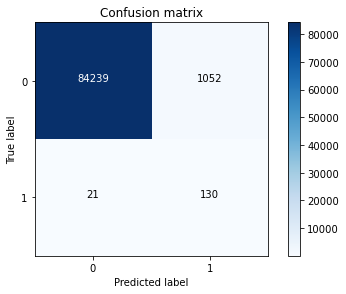

In [31]:
cnf_matrix = confusion_matrix(y_test,test_under_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

# Decision Tree

In [32]:
treeclf = DecisionTreeClassifier()
treeclf = treeclf.fit(x_res,y_res)
train_under_p = treeclf.predict(x_res)
print(classification_report(y_res, train_under_p))
test_under_p = treeclf.predict(x_test)
print (classification_report(y_test, test_under_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199023
           1       1.00      1.00      1.00    199023

    accuracy                           1.00    398046
   macro avg       1.00      1.00      1.00    398046
weighted avg       1.00      1.00      1.00    398046

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.51      0.75      0.61       151

    accuracy                           1.00     85442
   macro avg       0.76      0.87      0.80     85442
weighted avg       1.00      1.00      1.00     85442



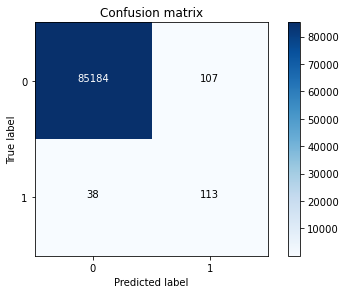

In [33]:
cnf_matrix = confusion_matrix(y_test,test_under_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

# Random Forest

In [34]:
rfclf = RandomForestClassifier(n_estimators=20)
rfclf = rfclf.fit(x_res,y_res)
train_under_p  = rfclf.predict(x_res)
print(classification_report(y_res, train_under_p ))
test_under_p = rfclf.predict(x_test)
print(classification_report(y_test, test_under_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199023
           1       1.00      1.00      1.00    199023

    accuracy                           1.00    398046
   macro avg       1.00      1.00      1.00    398046
weighted avg       1.00      1.00      1.00    398046

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.89      0.76      0.82       151

    accuracy                           1.00     85442
   macro avg       0.95      0.88      0.91     85442
weighted avg       1.00      1.00      1.00     85442



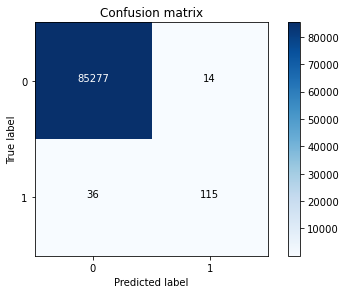

In [35]:
cnf_matrix = confusion_matrix(y_test,test_under_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()


# Original data

Logistic Regression

In [36]:
lrclf = LogisticRegression()
lrclf = lrclf.fit(x_train,y_train)
train_all_p = lrclf.predict(x_train)
print(classification_report(y_train, train_all_p))
test_all_p = lrclf.predict(x_test)
print(classification_report(y_test, test_all_p))

/home/abdullah/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199023
           1       0.71      0.71      0.71       341

    accuracy                           1.00    199364
   macro avg       0.85      0.86      0.85    199364
weighted avg       1.00      1.00      1.00    199364

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.63      0.67      0.65       151

    accuracy                           1.00     85442
   macro avg       0.81      0.83      0.82     85442
weighted avg       1.00      1.00      1.00     85442



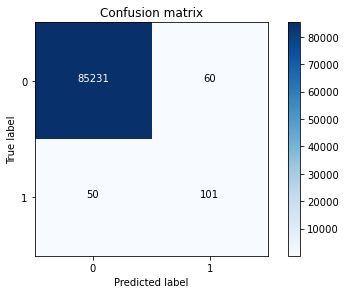

In [37]:
cnf_matrix = confusion_matrix(y_test,test_all_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()


Decision Tree

In [38]:
treeclf = DecisionTreeClassifier()
treeclf = treeclf.fit(x_train,y_train)
train_all_p = treeclf.predict(x_train)
print(classification_report(y_train, train_all_p))
test_all_p = treeclf.predict(x_test)
print(classification_report(y_test, test_all_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199023
           1       1.00      1.00      1.00       341

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.78      0.68      0.72       151

    accuracy                           1.00     85442
   macro avg       0.89      0.84      0.86     85442
weighted avg       1.00      1.00      1.00     85442



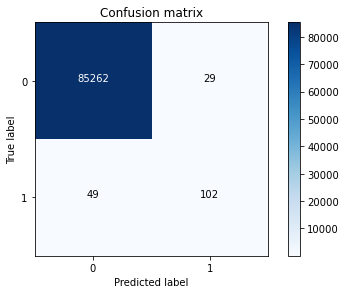

In [39]:
cnf_matrix = confusion_matrix(y_test,test_all_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

random forest

In [40]:
rfclf = RandomForestClassifier()
rfclf = rfclf.fit(x_train,y_train)
train_all_p = rfclf.predict(x_train)
print (classification_report(y_train, train_all_p))
test_all_p = rfclf.predict(x_test)
print (classification_report(y_test, test_all_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199023
           1       1.00      1.00      1.00       341

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.95      0.70      0.81       151

    accuracy                           1.00     85442
   macro avg       0.98      0.85      0.90     85442
weighted avg       1.00      1.00      1.00     85442



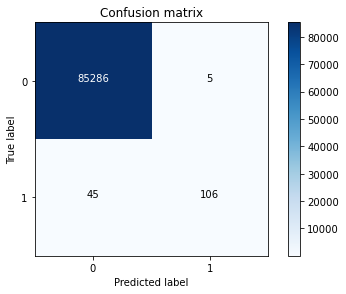

In [41]:
cnf_matrix = confusion_matrix(y_test,test_all_p)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()